In [1]:
# Importing libraries
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt

# Set max row to 300
pd.set_option('display.max_rows', 300)

In [29]:
# define simulation function
def simulate_path(s0, mu, sigma, horizon, timesteps, n_sims):

    # set the random seed for reproducibility
    random.seed(10000)

    # read parameters
    S0 = s0                 # initial spot price
    r = mu                  # mu = rf in risk neutral framework
    T = horizon             # time horizon
    t = timesteps           # number of time steps
    n = n_sims              # number of simulation

    # define dt
    dt = T/t                # length of time interval

    # simulate 'n' asset price path with 't' timesteps
    S = zeros((t,n))
    S[0] = S0

    for i in range(0, t-1):
        w = random.standard_normal(n)
        S[i+1] = S[i] * (1 + r*dt + sigma*sqrt(dt)*w)

    return S

In [3]:
# Assign simulated price path to dataframe for analysis and plotting
price_path = pd.DataFrame(simulate_path(100,0.05,0.2,1,252,100000))

# Verify the generated price paths
price_path.head(2)


,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
1,98.418418,100.241753,99.646644,100.431733,98.793448,100.306692,98.987585,100.154929,101.248576,100.123119,...,98.199306,99.273697,100.861574,100.608802,99.889286,100.399692,99.253621,100.017423,99.54609,99.928775


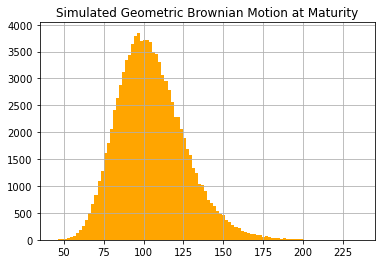

In [4]:
# Plot the histogram of the simulated price path at maturity
price_path.iloc[-1].hist(bins=100, color='orange')
plt.title('Simulated Geometric Brownian Motion at Maturity');

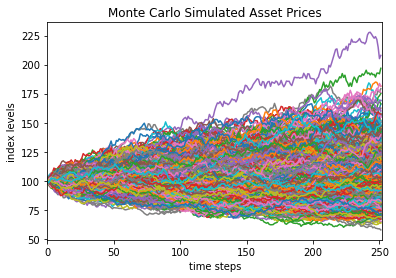

In [5]:
# Plot initial 100 simulated path using matplotlib
plt.plot(price_path.iloc[:,:1000])
plt.xlabel('time steps')
plt.xlim(0,252)
plt.ylabel('index levels')
plt.title('Monte Carlo Simulated Asset Prices');

In [28]:
# Call the simulation function
S = simulate_path(100,0.05,0.2,1,252,100000)

# Define parameters
K=100; r=0.05; T=1

# Calculate the discounted value of the expeced payoff
C0 = exp(-r*T) * mean(maximum(0, S[-1]-K))
P0 = exp(-r*T) * mean(maximum(0, K-S[-1]))

# Print the values
print(f"European Call Option Value is {C0:0.4f}")
print(f"European Put Option Value is {P0:0.4f}")

European Call Option Value is 10.4273
European Put Option Value is 5.5756


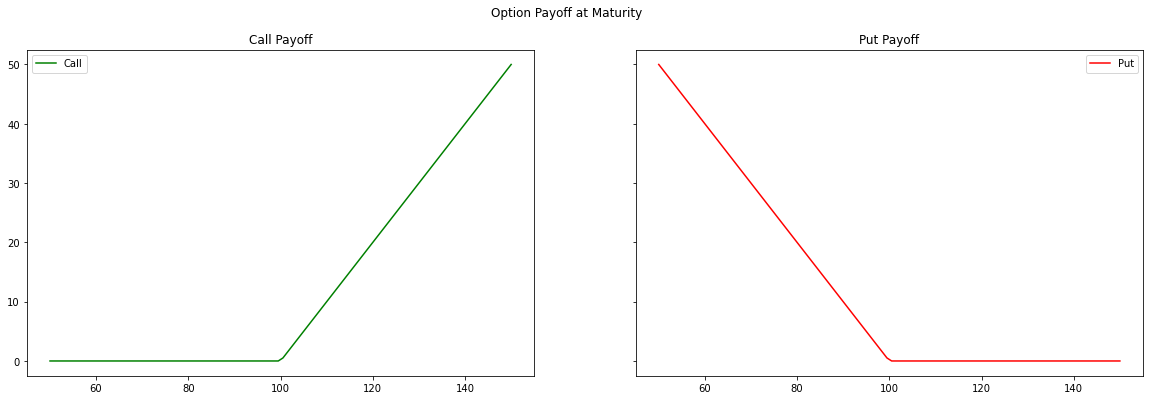

In [30]:
# range of spot prices 
sT= linspace(50,150,100)

# visualize call and put price for range of spot prices
figure, axes = plt.subplots(1,2, figsize=(20,6), sharey=True)
title, payoff, color, label = ['Call Payoff', 'Put Payoff'], [maximum(sT-K, 0), maximum(K-sT, 0)], ['green', 'red'], ['Call', 'Put']

# plot payoff 
for i in range(2):
    axes[i].plot(sT, payoff[i], color=color[i], label=label[i])
    axes[i].set_title(title[i])
    axes[i].legend()

figure.suptitle('Option Payoff at Maturity');

In [31]:
# Call the simulation function
S = simulate_path(100,0.05,0.2,1,252,100000)

# Define parameters
K=100; r=0.05; T=1

# Average price
A = S.mean(axis=0)
    
C0 = exp(-r*T) * mean(maximum(0, A-K))
P0 = exp(-r*T) * mean(maximum(0, K-A))

# Print the values
print(f"Asian Call Option Value is {C0:0.4f}")
print(f"Asian Put Option Value is {P0:0.4f}")

Asian Call Option Value is 5.7214
Asian Put Option Value is 3.3323


In [32]:
# Call the simulation function
S = simulate_path(100,0.05,0.2,1,252,100000)

# Define parameters
K=100; B=150; r=0.05; sigma=0.20; T=3; t=756; dt=T/t; n=100000; rebate = 30; value=0

# Barrier shift - continuity correction for discrete monitoring
B_shift = B*exp(0.5826*sigma*sqrt(dt))
B_shift

# Calculate the discounted value of the expeced payoff
for i in range(n):
    if S[:,i].max() < B_shift:
        value += maximum(0, S[-1,i]-K)
    else:
        value += rebate

C0 = exp(-r*T) * value/n

# Print the values 
print(f"Up-and-Out Barrier Call Option Value is {C0:0.4f}")

Up-and-Out Barrier Call Option Value is 8.3811


AttributeError: 'Figure' object has no attribute 'supxlabel'

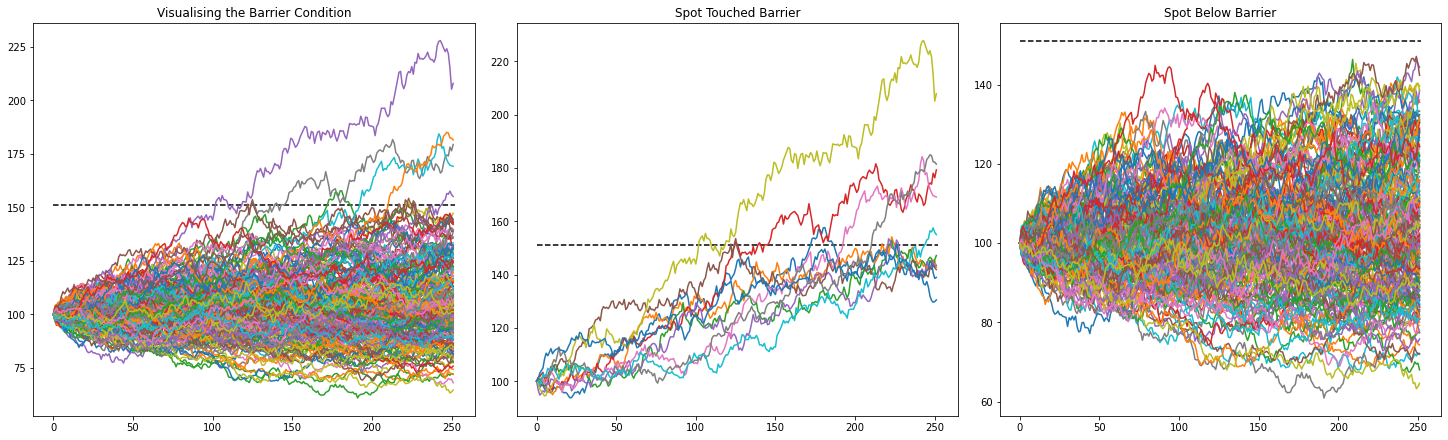

In [33]:
figure, axes = plt.subplots(1,3, figsize=(20,6), constrained_layout=True)
title = ['Visualising the Barrier Condition', 'Spot Touched Barrier', 'Spot Below Barrier']

axes[0].plot(S[:,:200])      
for i in range(200):
    axes[1].plot(S[:,i]) if S[:,i].max() > B_shift else axes[2].plot(S[:,i])

for i in range(3):
    axes[i].set_title(title[i])
    axes[i].hlines(B_shift, 0, 252, colors='k', linestyles='dashed')

figure.supxlabel('time steps')
figure.supylabel('index levels')

plt.show()
